In [28]:
import pandas as pd

In [29]:
import numpy as np

In [30]:
df = pd.read_excel('combined_customer_data.xlsx', sheet_name='Sheet1')

In [33]:
df.head()

,Transaction Cost,Unit Pack Size,Purchase Type,Product Name,Category
0,26112,100,Unit,Noodles,Noodles
1,55845,500,Carton,Macaroni Cavatto,Pasta
2,5700,200,Unit,Poundo Yam,Ball Foods
3,42420,100,Unit,Spaghetini,Pasta
4,9174,50,Unit,Garri,Ball Foods


In [32]:
df = df.drop(columns=['First Name', 'Last Name', 'Customer ID','Age','Gender','State'],axis=1)

In [34]:
df.head()

,Transaction Cost,Unit Pack Size,Purchase Type,Product Name,Category
0,26112,100,Unit,Noodles,Noodles
1,55845,500,Carton,Macaroni Cavatto,Pasta
2,5700,200,Unit,Poundo Yam,Ball Foods
3,42420,100,Unit,Spaghetini,Pasta
4,9174,50,Unit,Garri,Ball Foods


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

In [36]:
from feature_engine.encoding import OrdinalEncoder


In [37]:
ord = OrdinalEncoder(
    encoding_method='arbitrary',variables=['Purchase Type','Product Name','Category'])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
x_train.head()

,Transaction Cost,Unit Pack Size,Purchase Type,Product Name,Category
2880,41250,500,Unit,Garri,Ball Foods
163,18635,500,Unit,Poundo Yam,Ball Foods
1933,36500,500,Unit,Garri,Ball Foods
252,46134,100,Carton,Noodles,Noodles
1820,2630,50,Unit,Garri,Ball Foods


In [40]:
x_train_fe = ord.fit_transform(x_train)
x_test_fe = ord.transform(x_test)

In [41]:
ord.encoder_dict_

{'Purchase Type': {'Unit': 0, 'Carton': 1},
 'Product Name': {'Garri': 0,
  'Poundo Yam': 1,
  'Noodles': 2,
  'Macaroni Cavatto ': 3,
  'Spaghetini': 4,
  'Spaghetti': 5},
 'Category': {'Ball Foods': 0, 'Noodles': 1, 'Pasta': 2}}

In [42]:
x_train_fe.head()

,Transaction Cost,Unit Pack Size,Purchase Type,Product Name,Category
2880,41250,500,0,0,0
163,18635,500,0,1,0
1933,36500,500,0,0,0
252,46134,100,1,2,1
1820,2630,50,0,0,0


In [50]:
x_train_fe.to_csv('x_train_fe.csv', index=False)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train_fe)
x_test_sc = sc.transform(x_test_fe)

In [44]:
x_train_sc_pas = pd.DataFrame(x_train_sc, columns=ord.get_feature_names_out())
x_test_sc_pas= pd.DataFrame(x_test_sc, columns=ord.get_feature_names_out())

In [45]:
x_train_sc_pas.head()

,Transaction Cost,Unit Pack Size,Purchase Type,Product Name,Category
0,0.344573,0.871459,-0.477489,-0.874246,-0.512873
1,-0.360753,0.871459,-0.477489,-0.044429,-0.512873
2,0.196428,0.871459,-0.477489,-0.874246,-0.512873
3,0.496898,-0.585508,2.094289,0.785388,1.043895
4,-0.859924,-0.767628,-0.477489,-0.874246,-0.512873


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

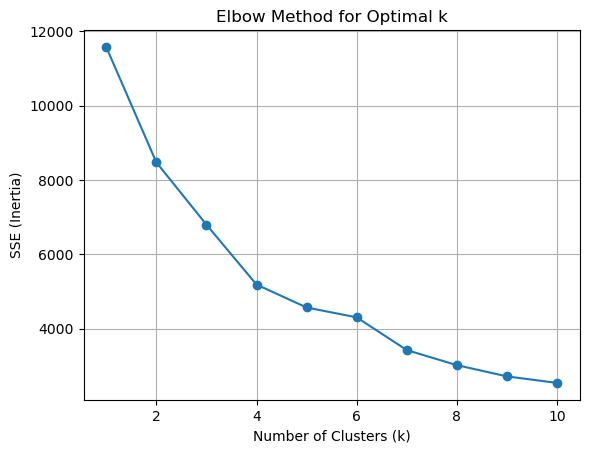

In [47]:
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_sc_pas)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure()
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [48]:
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_train_sc_pas)
    silhouette_scores.append(silhouette_score(x_train_sc_pas, labels))

In [49]:
silhouette_scores

[0.3625274746275541,
 0.31865637918686257,
 0.3812375855566299,
 0.3829368233113794,
 0.34043575439718793,
 0.40283449434953456,
 0.41627842685902283,
 0.4105282298133355]

### PICKLING

In [51]:
import pickle

In [52]:
import pickle

# Save these 3 objects
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(ord, f)

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


import pickle

In [53]:
import pandas as pd
from sqlalchemy import create_engine

# Load your CSV file
df = pd.read_excel('final_data.xlsx')  # Make sure this file is in your current directory

# Create SQLite engine
engine = create_engine("sqlite:///customers.db")

# Save the DataFrame to a table named 'customers'
df.to_sql("customers", con=engine, index=False, if_exists="replace")

print("✅ Database created as 'customers.db'")


✅ Database created as 'customers.db'
